<a href="https://colab.research.google.com/github/Regis0323/Module_2/blob/main/Rurangwa_Assignment_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #004B87; padding: 20px; text-align: center; border-radius: 10px; color: white; font-family: Arial, sans-serif; margin: auto; width: 80%;">
    <h1>IABE Data Science Certificate Module 2 Assignment</h1>
    <h2>RURANGWA IRADUKUNDA Jean-François Régis</h2>
    <h3>May 12, 2025</h3>
    <p>Email : jeanfrancoisregis.rurangwairadukunda@axa.be</p>
</div>


## Table of contents
1. [Introduction](#Introduction)<br />
2. [Data Exploration and Preprocessing](#Data_treatment)<br />
3. [Decision Trees In Classification And Regression](#Linear_Models)<br />
4. [Ensemble Methods: Bagging And Regression](#Testing)<br />
  4.1. [Bagging Method](#GLM)<br />
  4.2. [Regression Methods](#Regularization)<br />
  4.3. [Support Vector Machines](#SVM)<br />
5. [Neural Networks](#Clustering)<br />
6. [Conclusion](#Conclusion)<br />


# 1. Introduction<a name="Introduction"></a>


Following the 'Actuarial Data Scientist' program offered by the Belgian association of actuaries (IABE), we are tasked with an assignment that builds on the foundational concepts learned in the second module (out of three).
<br/>
This assignment involves analyzing the 'Medical Cost Personal Datasets' obtained from Kaggle. The dataset comprises various demographic and health-related features, along with the medical costs incurred by each individual.
<br/>

In this analysis, we will focus on employing decision trees for both classification and regression tasks, as well as exploring ensemble tree methods and introductory neural networks.
<br/>
The objective is to leverage these techniques to gain insights into the factors influencing medical costs and to develop predictive models that can effectively estimate these costs based on the available features.

#2. Data Exploration and Preprocessing<a name="Data_treatment"></a>

We start by importing different packages that will be of use throughout the analysis.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


!git clone https://github.com/Regis0323/Module_2.git
!pip install scikit-fuzzy

fatal: destination path 'Module_2' already exists and is not an empty directory.


Then we can proceed importing the dataset and having a small look of the data alongside the different types of the variables.

In [12]:
MedCost_data = pd.read_csv("/content/Module_2/insurance.csv")
display(MedCost_data.head())
print(MedCost_data.dtypes.value_counts())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


object     3
int64      2
float64    2
Name: count, dtype: int64


Our dataset is composed of 7 columns, of which 3 are categorized as 'object', 2 as 64-bit 'integer' (int64) and 2 as 64-bit 'floating-point' (float64) numbers.
<br>
We shall now check for missing and/or duplicated values before treating them accordingly if any.

In [13]:
#Potential missing values
Missing_Values=MedCost_data.isna().sum()
print(Missing_Values)

#Potential duplicated values
Duplicated_Values=MedCost_data[MedCost_data.duplicated(keep=False)]
print(Duplicated_Values)
  #Treating duplicated values
MedCost_data_cleaned=MedCost_data.drop_duplicates(keep='first')

#Information about the new cleaned dataset
MedCost_data_cleaned.info()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


After this first check, we can see that there are no missing values however we have one set of duplicates.
<br/>
Having treated the duplicated values, the new dataframe 'MedCost_data_cleaned' is composed of 7 columns and 1337 lines.
<br/>
The next step consists of converting categorical variables into suitable formats using the one-hot encode method which will enable our models (decision trees, ensemble methods, and neural networks) to effectively learn from the data without introducing any misleading ordinal relationships.

In [14]:
Clean_Data = pd.get_dummies(MedCost_data_cleaned, columns=['region','sex', 'smoker'], drop_first=True)

print(Clean_Data)

      age     bmi  children      charges  region_northwest  region_southeast  \
0      19  27.900         0  16884.92400             False             False   
1      18  33.770         1   1725.55230             False              True   
2      28  33.000         3   4449.46200             False              True   
3      33  22.705         0  21984.47061              True             False   
4      32  28.880         0   3866.85520              True             False   
...   ...     ...       ...          ...               ...               ...   
1333   50  30.970         3  10600.54830              True             False   
1334   18  31.920         0   2205.98080             False             False   
1335   18  36.850         0   1629.83350             False              True   
1336   21  25.800         0   2007.94500             False             False   
1337   61  29.070         0  29141.36030              True             False   

      region_southwest  sex_male  smoke

We now have a dataset '**Clean_Data**' of 1337 lines and 9 columns which is treated to the max (removal of duplicates and treatment of categorical variables), clean and is ready to be used in different models.

# 3. Decision Trees In Classification And Regression<a name="Linear_Models"></a>

In this section we shall start by training a decision tree classifier to predict whether a person is a smoker and evaluate the classification performance using appropriate evaluation criteria.

Then we shall train a decision tree regressor to predict the insurance charges followed by the regression performance using appropriate metrics as well.

Finally we shall discuss the interpretability of decision trees and identify which features appear most influential.


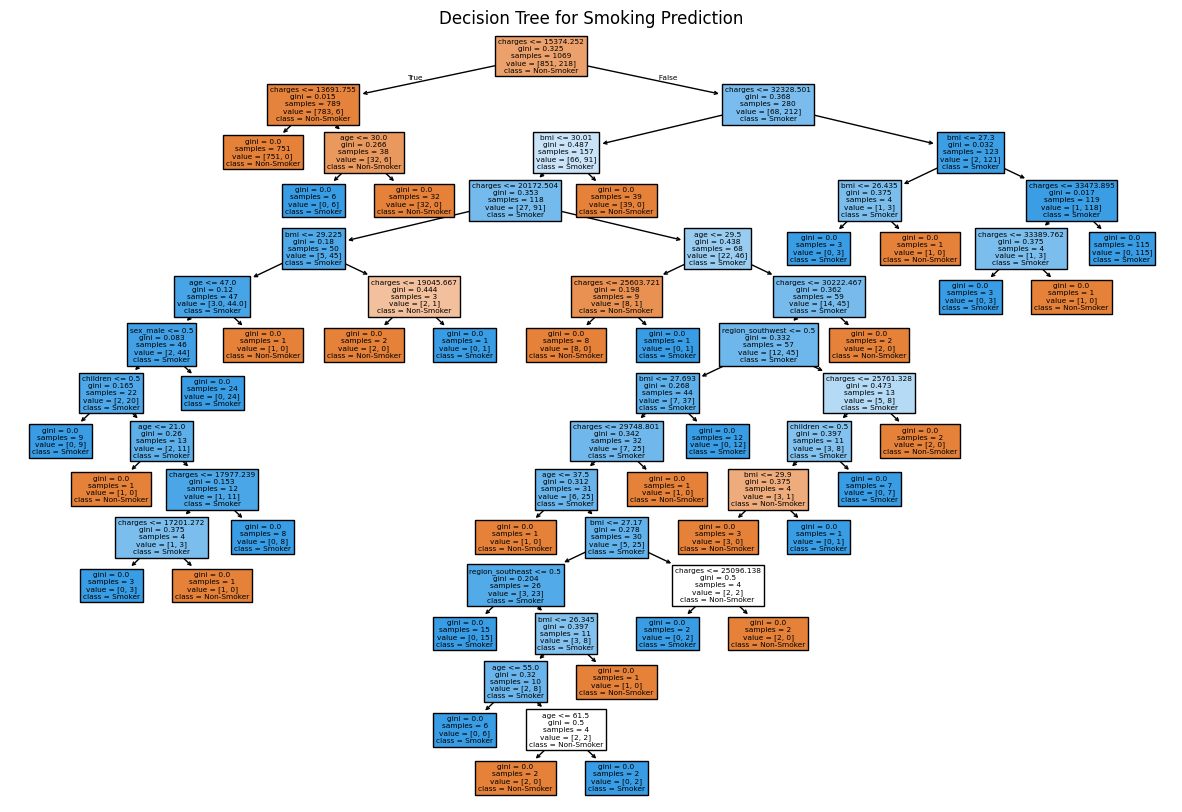

Accuracy: 0.95


In [15]:
##  Decision tree classifier to predict whether a person is a smoker (classification) ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Classification
classifier = DecisionTreeClassifier(random_state=23)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Visualization of the decision Tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['Non-Smoker', 'Smoker'], filled=True)
plt.title('Decision Tree for Smoking Prediction')
plt.show()

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Here we trained the decision tree classifier on 80% of the entire dataset and tested it on 20% which gave us an accuracy of 95%, having used original settings and no pruning.

We shall now use a the 'GridSearch' method to find the right parameters to prune the tree as to increase the test accuracy.

In [16]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Grid search initialization
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=23), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Prediction using the best estimator
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

# Accuracy calculation
Best_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {Best_accuracy:.2f}')

Best parameters: {'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9692673992673992
Accuracy with best parameters: 0.97


Having used different values for the parameters on a training set of 73% of the entire dataset and tested it on 27%, which is a good split for our dataset of 1337 lines and 9 columns to ensure no under and/or overfitting, we got as a result the following parameters: NO max_depth, a maximum of 10 leaf nodes, a minimum of 5 leafs' samples and a minimum of 2 split samples.

The results are remarquable since we have the cross-validation accuracy equal to 97% and the accuracy on the test set is 97% as well showing us that what we did on the training set is remarquably reproduced on the test set as well.

We shall now plot it.

Accuracy with best parameters: 0.97
            Feature  Importance
3           charges    0.853658
1               bmi    0.114544
0               age    0.031798
2          children    0.000000
4  region_northwest    0.000000
5  region_southeast    0.000000
6  region_southwest    0.000000
7          sex_male    0.000000
Decision path for the instance:
Node 0:
  Feature: charges <= 15374.25
Node 1:
  Feature: charges <= 14452.75
Node 11:
  Feature: region_southwest <= -2.00


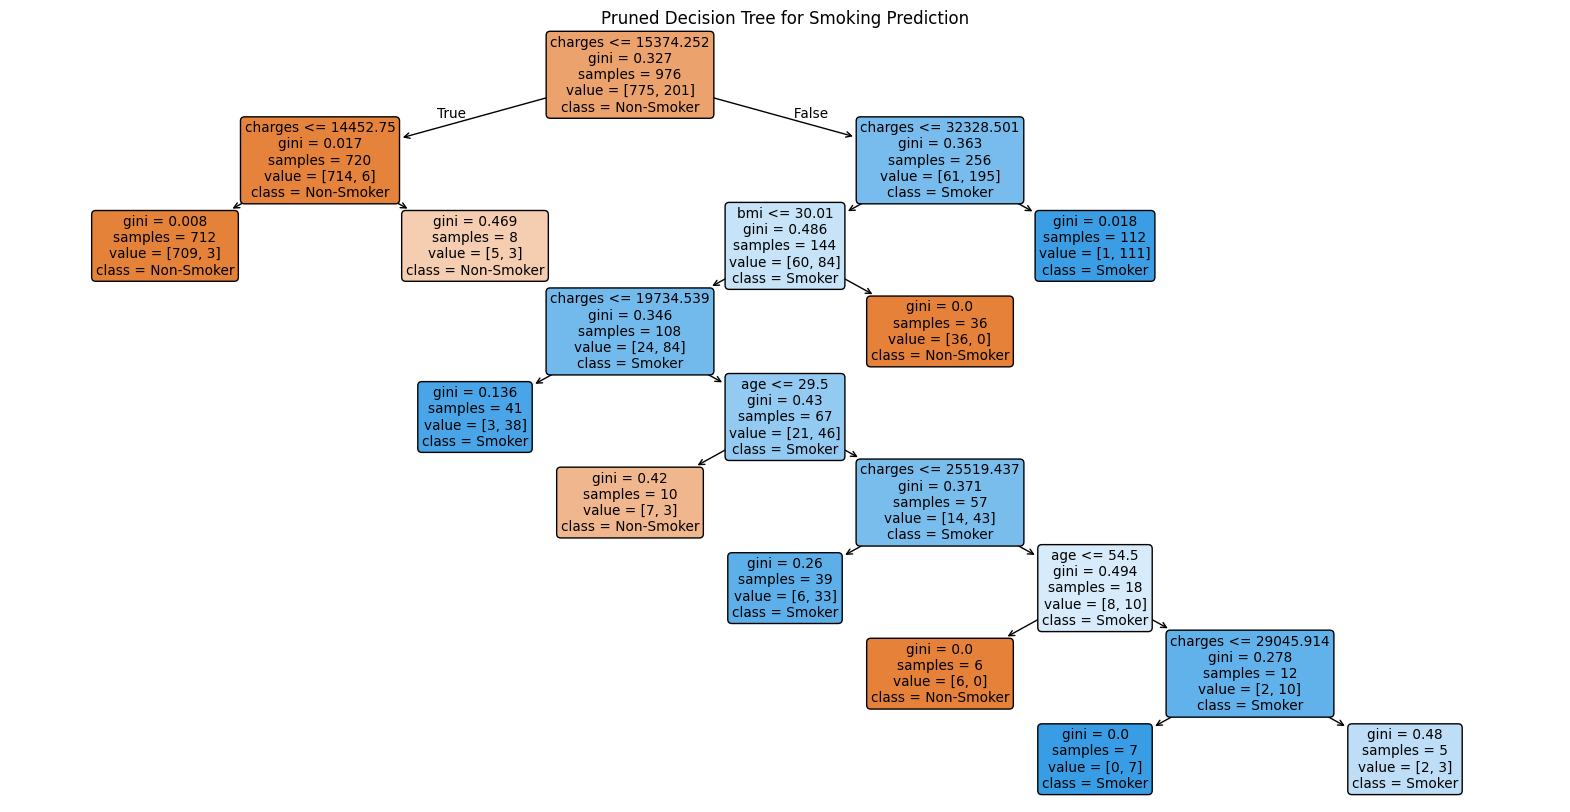

In [17]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Best defined parameters
best_params = {
    'max_depth': None,
    'max_leaf_nodes': 10,
    'min_samples_leaf': 5,
    'min_samples_split': 2
}

# Classification
classifier = DecisionTreeClassifier(random_state=23, **best_params)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy:.2f}')

# Feature importance
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Path decision
def plot_decision_path(instance):
    instance_reshaped = instance.values.reshape(1, -1)
    decision_path = classifier.decision_path(instance_reshaped)
    node_indicator = decision_path.indices
    feature = classifier.tree_.feature
    threshold = classifier.tree_.threshold

    print("Decision path for the instance:")
    for node_id in node_indicator:
        if node_id >= 0:
            print(f"Node {node_id}:")
            print(f"  Feature: {X.columns[feature[node_id]]} <= {threshold[node_id]:.2f}")
        else:
            print(f"Leaf node reached: {node_id}")

plot_decision_path(X_test.iloc[0])

# Pruned decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['Non-Smoker', 'Smoker'], filled=True, rounded=True, impurity=True)
plt.title('Pruned Decision Tree for Smoking Prediction')
plt.show()

These results indicate that our decision tree model is performing exceptionally well. Charges are the primary driver of predictions, followed by BMI, while other features have little to no impact. The model's high accuracy and consistent cross-validation scores suggest that it generalizes well to unseen data.

We shall now predict the insurance charges by training a decision tree regressor.

In [18]:
##  Decision tree regression to predict the insurance charges  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'max_leaf_nodes': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=23),
    param_distributions=param_grid,
    n_iter=100,  # Number of combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=23
)

random_search.fit(X_train, y_train)

print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation MSE:", -random_search.best_score_)

Best parameters from Randomized Search: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_depth': 7}
Best cross-validation MSE: 22494112.491937943


Having used different values for the parameters on a training set of 70% of the entire dataset and tested it on 30%, we got as a result the following parameters: a maximum depth of 7, a maximum of 10 leaf nodes, a minimum of 2 leafs' samples and a minimum of 10 split samples.

The best mean squared error MSE using those parameters is estimated at roughly 22.5 million. We shall now plot it.

Mean Squared Error: 23754598.08
R-squared: 0.84
            Feature  Importance
7        smoker_yes    0.725326
1               bmi    0.173178
0               age    0.095748
2          children    0.005748
3  region_northwest    0.000000
4  region_southeast    0.000000
5  region_southwest    0.000000
6          sex_male    0.000000
Interpreting decision path for the first instance in the test set:
Decision path for the instance:
Node 0:
  Feature: smoker_yes <= 0.50
Node 1:
  Feature: age <= 42.50
Node 6:
  Feature: age <= 54.50
Node 11:
  Feature: sex_male <= -2.00


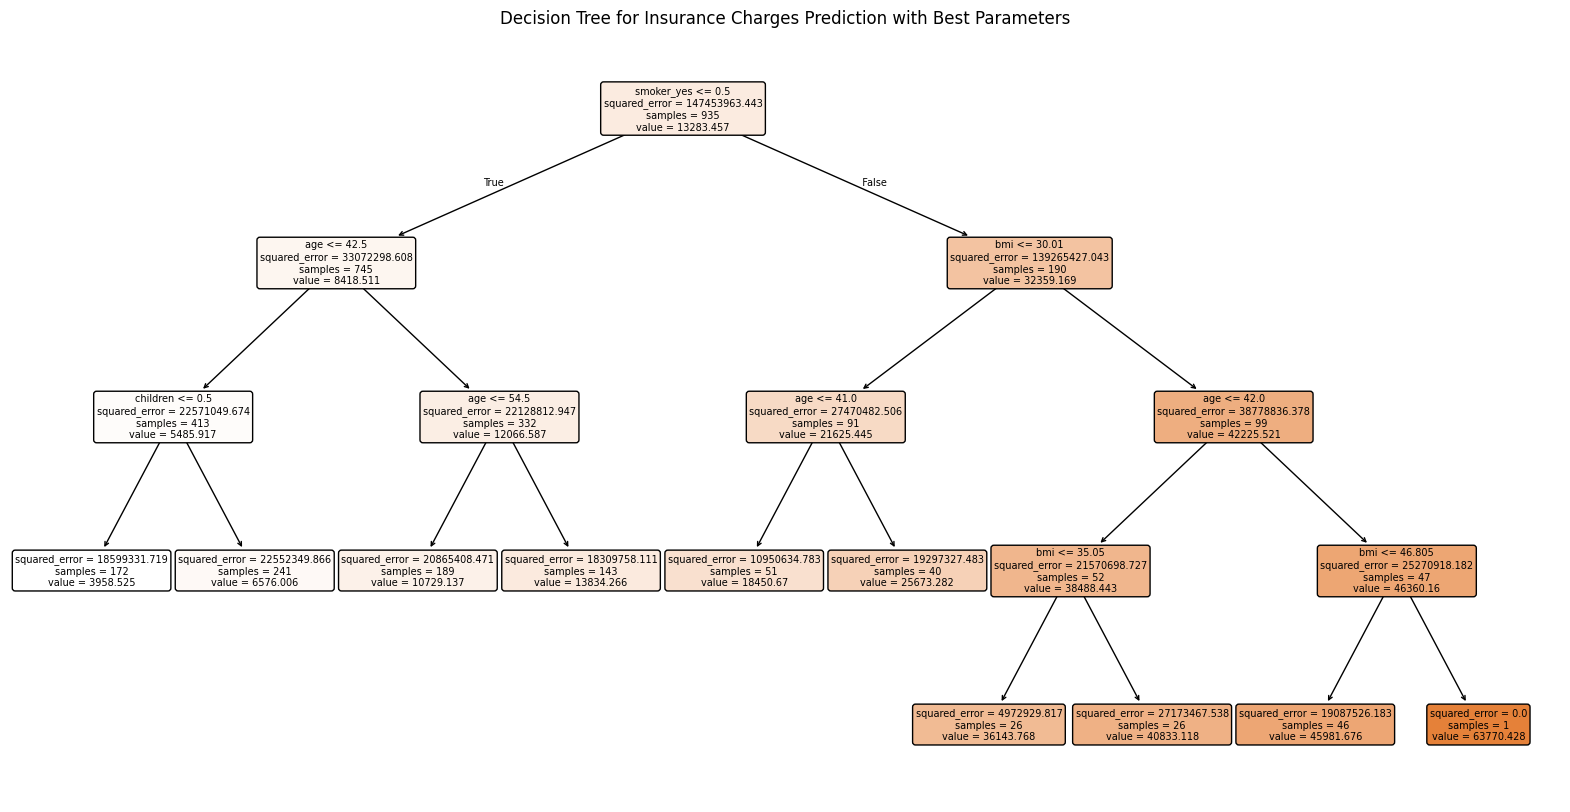

In [19]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Best parameters from Randomized Search
best_params = {
    'max_depth': 7,
    'max_leaf_nodes': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 10
}

# Fitting the decision tree regressor with the best parameters
regressor = DecisionTreeRegressor(random_state=23, **best_params)
regressor.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Path decision
def plot_decision_path(instance):
    instance_reshaped = instance.values.reshape(1, -1)
    decision_path = regressor.decision_path(instance_reshaped)
    node_indicator = decision_path.indices
    feature = regressor.tree_.feature
    threshold = regressor.tree_.threshold

    print("Decision path for the instance:")
    for node_id in node_indicator:
        if node_id >= 0:
            print(f"Node {node_id}:")
            print(f"  Feature: {X.columns[feature[node_id]]} <= {threshold[node_id]:.2f}")
        else:
            print(f"Leaf node reached: {node_id}")

print("Interpreting decision path for the first instance in the test set:")
plot_decision_path(X_test.iloc[0])

# Enhanced decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          impurity=True,
          fontsize=7)
plt.title('Decision Tree for Insurance Charges Prediction with Best Parameters')
plt.show()

The results above indicate that the model performs reasonably well in explaining insurance charges, with smoking status being the most influential factor. The MSE might be a little high but the r-squared value, 84%, shows that the model is quite well explained.

The interpretability of decision trees allows for a straightforward understanding of how different features influence predictions.
The analysis done above shows that smoking status, charges, BMI, and age are the most influential features in determining whether a person is a smoker and predicting insurance charges, respectively. This insight can guide further feature selection, model refinement, and decision-making processes in applications similar to the one we have in an insurance company case but the pruning and parameter fitting is crucial to avoid over and/or underfitting.

# 4. Ensemble Methods: Bagging And Regression<a name="Testing"></a>

In this section we shall use the same 'Clean_data' dataset and, for both the classification (smoker vs non-smoker) and the regression (charges), firstly train a Random Forest (bagging method) before training a boosted model (XGBoost in this case for its accuracy and robustness).

We shall as well compare the results with the decision trees and finish by providing insights on hyperparameters (e.g., number of trees, learning rate) and how they affect model performance and training time.

## 4.1. Bagging Method<a name="GLM"></a>

In [26]:
##  Random Forest to predict whether a person is a smoker (classification)  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Parameter grid definition
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search initialization
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=23),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=23
)

random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Best parameters from Randomized Search: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}
Best cross-validation accuracy: 0.9672265829408687


Accuracy with best parameters: 0.96
            Feature  Importance
3           charges    0.833668
1               bmi    0.079220
0               age    0.049735
2          children    0.016012
7          sex_male    0.007422
5  region_southeast    0.006131
4  region_northwest    0.004563
6  region_southwest    0.003250


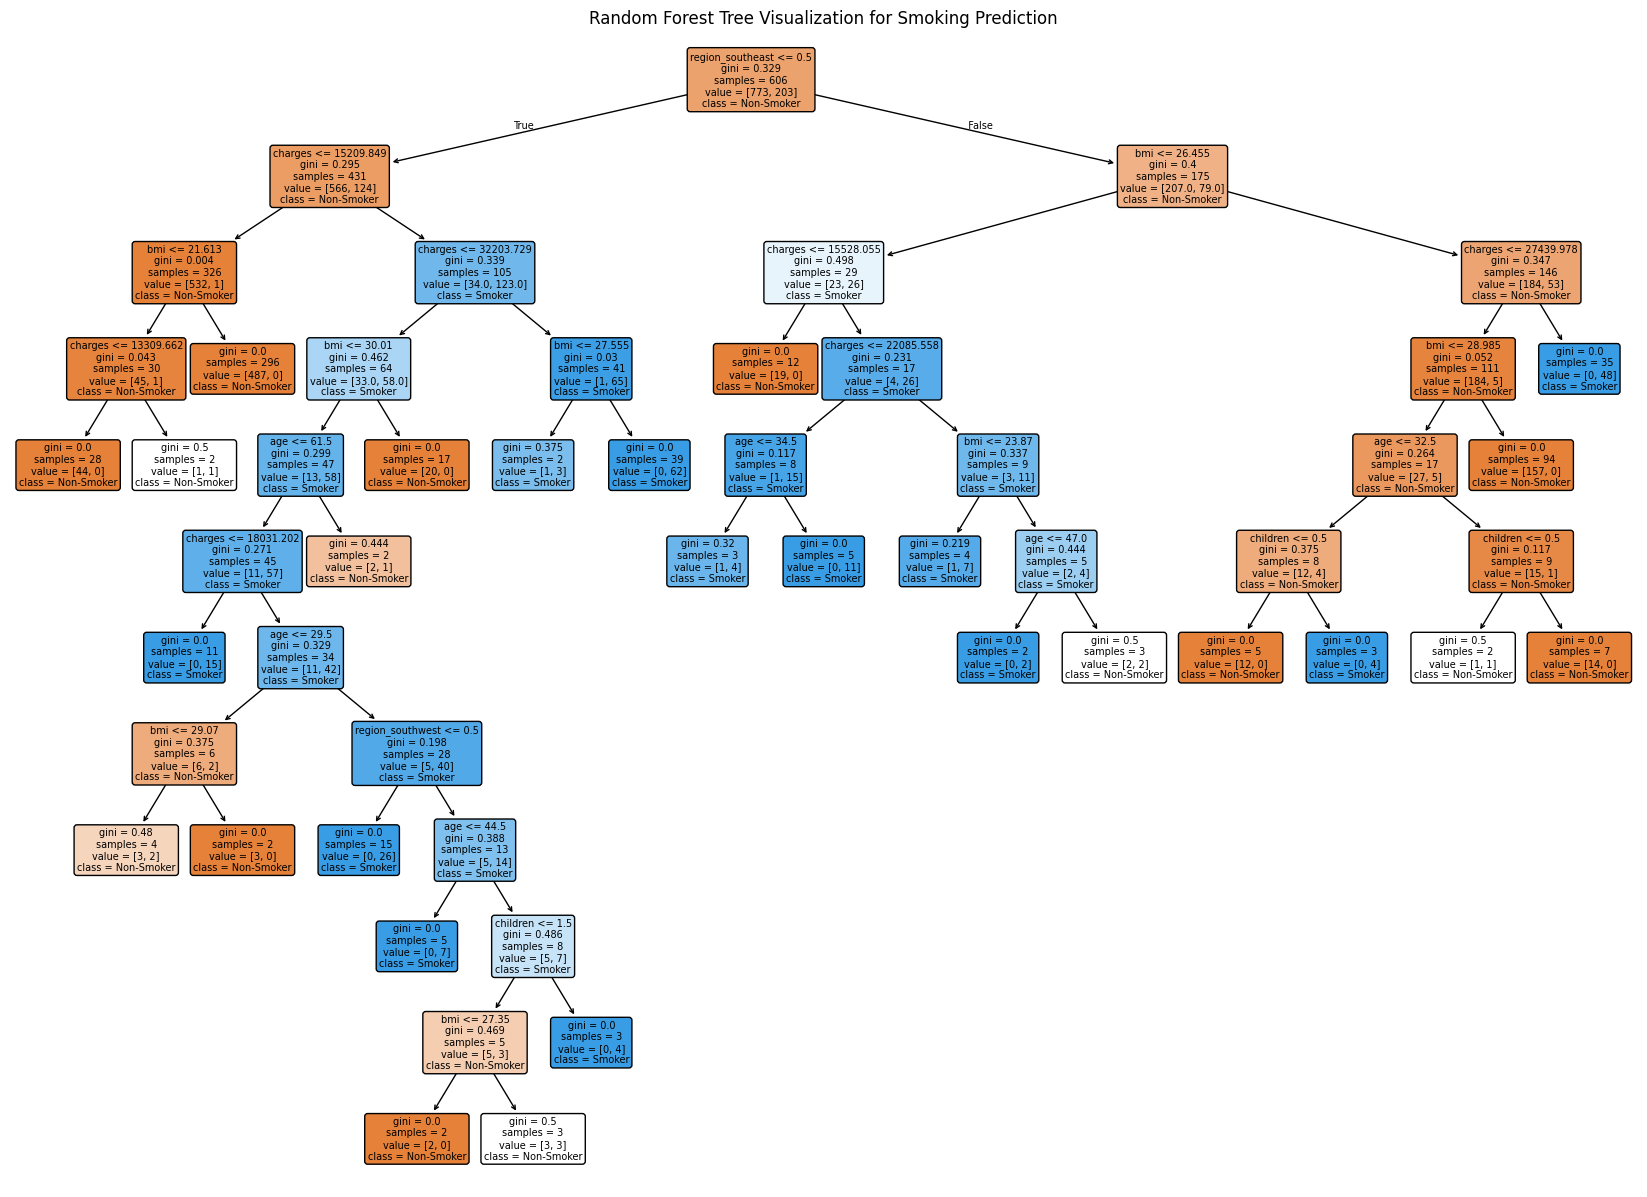

In [42]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Best parameters from Randomized Search
best_params = {
    'n_estimators': 50,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'log2'
}

# Fitting the Random Forest classifier with the best parameters
classifier = RandomForestClassifier(random_state=23, **best_params)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy:.2f}')

# Feature importance
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Visualization of one tree from the Random Forest
plt.figure(figsize=(21, 15))
plot_tree(classifier.estimators_[0],
          feature_names=X.columns,
          class_names=['Non-Smoker', 'Smoker'],
          filled=True,
          rounded=True,
          impurity=True,
          fontsize=7)
plt.title('Random Forest Tree Visualization for Smoking Prediction')
plt.show()

We start with the Generalized linear models. The methodology consists in dividing the dataset in 2 sets(1 training set and 1 testing set), then we'll fit a logistic regression model to the training data and predict the probabilities of fraudulent claims on the test set before converting these probabilities into binary classifications using a threshol and evaluating the model's performance with classification metrics.

In [ ]:
##  Random Forest to predict the insurance charges (regression) ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Parameter grid definition
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search initialization
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=23),
    param_distributions=param_grid,
    n_iter=100,  # Number of combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=23
)

random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation MSE:", -random_search.best_score_)

In [ ]:
# Best parameters from Randomized Search
best_params = random_search.best_params_

# Fitting the Random Forest regressor with the best parameters
regressor = RandomForestRegressor(random_state=23, **best_params)
regressor.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error with best parameters: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest Regression')
plt.show()

This model demonstrates a solid ability to classify claims as fraudulent or not, with an overall accuracy of 77.39%. With a recall of 88% for Class 0, it performs particularly well in identifying non-fraudulent claims.
<br>
However, while the model shows improved performance in detecting fraudulent claims with a recall of 52%, there is still a significant opportunity for enhancement in this area. The precision for fraudulent claims is also moderate at 64%.
<br>
Overall, the model is a valuable tool for fraud detection but may benefit from further refinement to increase its sensitivity to fraudulent claims while maintaining its effectiveness in identifying legitimate claims.

## 4.2. Regression Methods<a name="Regularization"></a>

In [ ]:
##  XGBoost to predict whether a person is a smoker (classification)  ##

from xgboost import XGBClassifier, XGBRegressor, plot_importance, plot_tree
import xgboost as xgb

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid search initialization
grid_search = GridSearchCV(XGBClassifier(random_state=23), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Prediction using the best estimator
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

# Accuracy calculation
Best_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {Best_accuracy:.2f}')

In [ ]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Best defined parameters
best_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 23
}

# Classification
classifier = XGBClassifier(**best_params)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy:.2f}')

# Feature importance
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(classifier, importance_type='weight', title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

# Decision path (note: XGBoost does not have a direct equivalent to the decision path like sklearn, but you can visualize the model)
plt.figure(figsize=(20, 10))
plot_tree(classifier, num_trees=0, rankdir='LR', figsize=(20, 10),
          feature_names=X.columns, class_names=['Non-Smoker', 'Smoker'], filled=True)
plt.title('XGBoost Tree for Smoking Prediction')
plt.show()

Now we shall use the same methodology and variables as above IN section 3 (with reduced/optimal variables) to run tests under the Ridge, Lasso and ElasticNet regression models to predict the claim amount before comparing all the results together.

In [ ]:
##  XGBoost to predict the insurance charges (regression)  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search initialization
random_search = RandomizedSearchCV(
    XGBRegressor(random_state=23),
    param_distributions=param_grid,
    n_iter=100,  # Number of combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=23
)

random_search.fit(X_train, y_train)

# Best parameters and best cross-validation score
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation MSE:", -random_search.best_score_)

# Prediction using the best estimator
best_regressor = random_search.best_estimator_
y_pred = best_regressor.predict(X_test)

# Mean Squared Error calculation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with best parameters: {mse:.2f}')

Linear Regression - MSE: 0.2515, MAE: 0.3632, R-squared: 0.7357
Ridge Regression - MSE: 0.2514, MAE: 0.3644, R-squared: 0.7357
Lasso Regression - MSE: 0.9515, MAE: 0.7728, R-squared: -0.0000
ElasticNet Regression - MSE: 0.9515, MAE: 0.7728, R-squared: -0.0000


On one side, we observe that performance of Ridge regression is similar to linear regression, meaning that the regularization did not significantly improve the model. On the other side, the poor performance of Lasso and ElasticNet suggests that aggressive regularization may have led to underfitting.

In [ ]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Best parameters from Randomized Search
best_params = {
    'max_depth': 7,
    'learning_rate': 0.1,  # Adjust based on your tuning results
    'n_estimators': 100,    # Adjust based on your tuning results
    'min_child_weight': 1,  # Adjust based on your tuning results
    'subsample': 0.8,       # Adjust based on your tuning results
    'colsample_bytree': 0.8  # Adjust based on your tuning results
}

# Fitting the XGBoost regressor with the best parameters
regressor = XGBRegressor(random_state=23, **best_params)
regressor.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Tree visualization
plt.figure(figsize=(20, 10))
plot_tree(regressor, num_trees=0, feature_names=X.columns, filled=True)
plt.title('XGBoost Tree for Insurance Charges Prediction with Best Parameters')
plt.show()


Model Coefficients:
Linear Regression Coefficients: [ 0.03492606  0.0188951  -0.0037001  -0.02663318 -0.02549859  0.00455651
 -0.03646801  0.04865516 -0.01363781 -0.04249516  0.0068666  -0.03536814
 -0.0886783   0.12314123  0.01881566  0.08739506  0.07817879  0.08751039
  0.03504152  0.04217191  0.10164728 -0.16329376  0.11712064  0.04697916
  0.05287375  0.03869984  0.04840236  0.03462854 -0.01026188  0.09122442
  0.05787783  0.02568278  0.07479156  0.01766189  0.09480224  0.14845892
 -2.19415636  0.02860654 -2.19001268 -0.09496418 -0.0400452  -0.04033291
 -0.07683033 -0.01492786 -0.00929052  0.09976713  0.06957029  0.11346304
  0.10678654 -0.00639654  0.04735657]
Ridge Regression Coefficients: [ 0.03433808  0.01877615 -0.00409051 -0.02812939 -0.02432241  0.01042172
  0.12229735  0.05260875 -0.01476223 -0.04428477  0.00360495 -0.04055301
 -0.09267913  0.1228915   0.01803859  0.08557756  0.0684208   0.08543842
  0.04310738  0.03619323  0.10913714 -0.14739575  0.12441546  0.04160702
  

We can conclude saying that regularization techniques such as Ridge Regression reduce overfitting by penalizing large coefficients while retaining all features whereas Lasso Regression enhances model interpretability by forcing some coefficients to zero at the risk of excluding important predictors and the ElasticNet Regression combines the benefits of both approaches to enable coefficient shrinkage and feature selection, especially in datasets with correlated features.<br>
In our case, the Ridge Regression performed in a similar way as the Linear Regression but the Lasso and ElasticNet regressions performed badly due to the underfitting caused by their agressive regularization.

Tuning hyperparameters in Random Forest models is essential for optimizing performance, as they directly impact model accuracy, overfitting, and training efficiency. Key hyperparameters include the number of trees (n_estimators), which can enhance performance by reducing variance but increases training time and memory usage; maximum depth (max_depth), which controls tree complexity and helps mitigate overfitting; minimum samples split (min_samples_split), which prevents the model from capturing overly specific patterns; minimum samples leaf (min_samples_leaf), which can smooth the model and enhance training speed; maximum features (max_features), which influences the number of features considered for splits and affects both overfitting and training speed; and subsample, which determines the fraction of data used for fitting individual trees and can enhance generalization. Achieving an effective balance between high performance and resource management is crucial, and systematic methods like grid search or randomized search can facilitate the identification of optimal hyperparameter settings for a given dataset.

# 5. Neural Networks<a name="Clustering"></a>

In this section we shall use the 'K-means++', an improved version of the standard k-means algorithm as it initializes the cluster centroids in a way that spreads them out leading to better clustering results and faster convergence, to the dataset to group the claims based on their features before analysing the clusters and providing insights about the characteristics of each cluster.

In [ ]:
##  Neural networks to predict whether a person is a smoker (classification)  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# One-hot encoding for the target variable
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Plotting training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Using the elbow method, we could say that the optimal number of clusters is somewhere between 8 and 12 clusters whereas using the average silhouette score, k=2 would be the best fit. We shall go with the average silhouette score method as it indicates better-defined clusters.

In [ ]:
##  Neural networks to predict the insurance charges (regression)  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {loss:.2f}')

# Plotting training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for Regression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

Neural networks offer advantages such as the ability to model complex, non-linear relationships and their scalability to large datasets, making them suitable for tasks like image and speech recognition. However, they typically require larger amounts of data for effective training and can be less interpretable than tree-based models, which provide clear decision paths and feature importance insights, making them easier to understand and explain. Additionally, tree-based models generally require less tuning and are more robust to overfitting with smaller datasets, while neural networks may necessitate careful hyperparameter tuning and regularization techniques.

# 6. Conclusion<a name="Conclusion"></a>

In conclusion, we have seen different data science methods/regressions to study and predict either the claim amount or determine whether a claim was fraudulent or not in the 'Auto Insurance Claims Data" dataset from Kaggle.
<br>
After treating the dataset appropriately, we went from regression models such as: Linear, Ridge, Lasso and ElasticNet, to Generalized Linear models and Support Vector Machines before finishing on Clustering Methods, and more particularly the k-means++ method.
<br>
Each method had its particularity and was performant except for regularization methods, Lasso and ElasticNet models, which were not performant at all due to : Lasso forcing some coefficients to zero at the risk of excluding important predictors and ElasticNet for combining the benefits of both approaches to enable coefficient shrinkage and feature selection, especially in datasets with correlated features.